# MobileNet
### Nama Kelompok: Shogun 
Anggota Kelompok: (beserta jobdesknya)
1. Yohani Seprini (210711478)
mengumpulkan dan menentukan dataset (untuk train validation test split), mengatasi error pada arsitekture model (AlexNet, GoogleNet, MobileNet, Vgg-16), mengerjakan data preparation (mengubah dataset menjadi iterator numpy, mengambil batch dari iterator,normalisasi data dan menampilkan hasil sebelum dan setelah normalisasi, menghitung jumlah batch dalam dataset, menampilkan visualisasi gambar setelah normalisasi), data augmentasi, implementasi data augmentasi menyimpan akurasi dan loss, mengerjakan model deployment, analisis hasil model dan menentukan model terbaik, dan melakukan deployment pada streamlit

2. Marcella Alicia Ndala (220711907)
mengerjakan arsitektur model AlexNet, mengerjakan preprocessing data, menampilkan visualisasi data gambar dari dataset, mengerjakan grafik akurasi dan loss AlexNet

3. Mardika Gidion Omega Limbongan (220712025)
mengerjakan arsitektur model GoogleNet, menentukan parameter model alexnet, training model dan memantau proses training, impelementasi early stopping dan callbacks, melakukan penyimpanan model setelah training

4. Aprilius Setio Budi Juja (220712045)
mengerjakan arsitektur model MobileNet, impelementasi prediksi untuk dataset uji pada semua model (AlexNet, GoogleNet, MobileNet, VGG-16),menghitung dan menampilkan confusion matrix, menghitung evaluasi metrik model (AlexNet, GoogleNet, MobileNet, VGG-16), visualisasi confusion matrix

5. Jawara Theo Christo (220712066)
mengerjakan arsitektur model VGG-16, pengujian model dataset uji untuk semua model (AlexNet, GoogleNet, MobileNet, VGG-16), membantu analisis hasil prediksi, analisis kesalahan prediksi, melakukan perbandingan antar model (AlexNet, GoogleNet, MobileNet, VGG-16)

### Data Loading

In [115]:
# import library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image


In [116]:
# direktori dataset
count = 0
dirs = os.listdir(r'D:\Projek UAS PMDPM SHOGUN\Dataset\train')
for dir in dirs:
    files = list(os.listdir(r'D:\Projek UAS PMDPM SHOGUN\Dataset\train/' + dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Garlic Folder has 250 Images
Onion Folder has 250 Images
Red_Onion Folder has 250 Images
Images Folder has 750 Images


In [117]:
# membaca data dari direktori
base_dir = r'D:\Projek UAS PMDPM SHOGUN\Dataset\train'
validation_split = 0.1

# membaca data dari direktori
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

# menampilkan class name
class_names = dataset.class_names
print("Class names:", class_names)

Found 750 files belonging to 3 classes.
Class names: ['Garlic', 'Onion', 'Red_Onion']


In [118]:
# train validation test split
total_count = len(list(dataset))
val_count = int(total_count * validation_split)
train_count = total_count - val_count
test_count = int(len(dataset) * 0.1) 

print("Total images:", total_count)
print("Train images:", train_count)
print("Validation images:", val_count)
print("Test images:", test_count) 

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count).take(val_count)
test_ds = dataset.skip(train_count + val_count).take(test_count)

Total images: 24
Train images: 22
Validation images: 2
Test images: 2


### Data Visualization

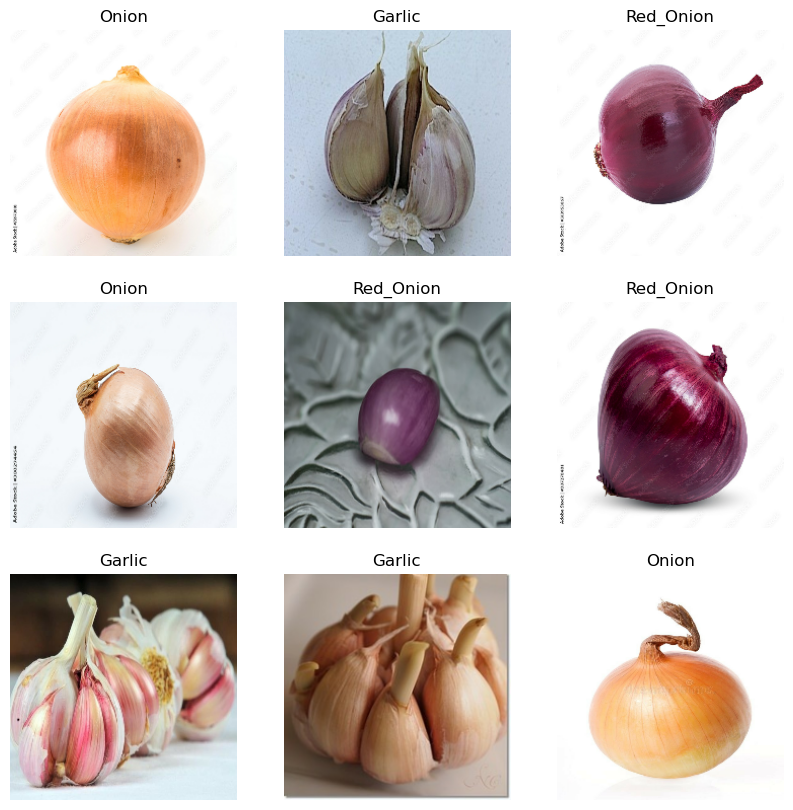

In [119]:
# menampilkan data gambar dengan paramter jumlah gambar yang ditampilkan
i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) # ukuran gambar
        plt.imshow(images[i].numpy().astype("uint8")) # label gambar
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Data Preparation

In [120]:
# mengubah dataset menjadi iterator numpy
data_iterator = dataset.as_numpy_iterator()
print("data_iterator:", data_iterator)

# mengambil batch berikutnya dari iterator
batch = data_iterator.next()
print("batch:", batch)

data_iterator: NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002197B3CA390>)
batch: (array([[[[ 66.96429  ,  39.964287 ,   9.964286 ],
         [ 65.89286  ,  38.892857 ,   8.892858 ],
         [ 64.82143  ,  37.82143  ,   7.821429 ],
         ...,
         [ 82.82143  ,  52.821426 ,  16.821426 ],
         [ 82.10715  ,  52.107147 ,  16.107147 ],
         [ 82.       ,  52.       ,  16.       ]],

        [[ 66.01786  ,  39.017857 ,   9.017858 ],
         [ 64.946434 ,  37.946426 ,   7.9464283],
         [ 63.705994 ,  36.705994 ,   6.7059956],
         ...,
         [ 82.04401  ,  52.044006 ,  16.044004 ],
         [ 82.00574  ,  52.00574  ,  16.00574  ],
         [ 82.       ,  52.       ,  16.       ]],

        [[ 68.69643  ,  39.875    ,   8.053572 ],
         [ 67.52742  ,  38.705994 ,   6.8845663],
         [ 65.626915 ,  36.805485 ,   4.984056 ],
         ...,
         [ 80.17857  ,  50.17857  ,  16.       ],
         [ 80.17857  ,

In [121]:
# normalisasi data dengan membagi nilai piksel dengan 255.0
data = dataset.map(lambda x, y: (x/255.0, y))

# tampil tipe data setelah normalisasi
print("Data type after normalization: {}".format(dataset.element_spec))
# tampil bentuk data setelah normalisasi
print("Data shape after normalization: {}".format(dataset.element_spec))
# hitung jumlah batch dalam dataset
print("Jumlah images:", len(dataset))

Data type after normalization: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Data shape after normalization: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah images: 24


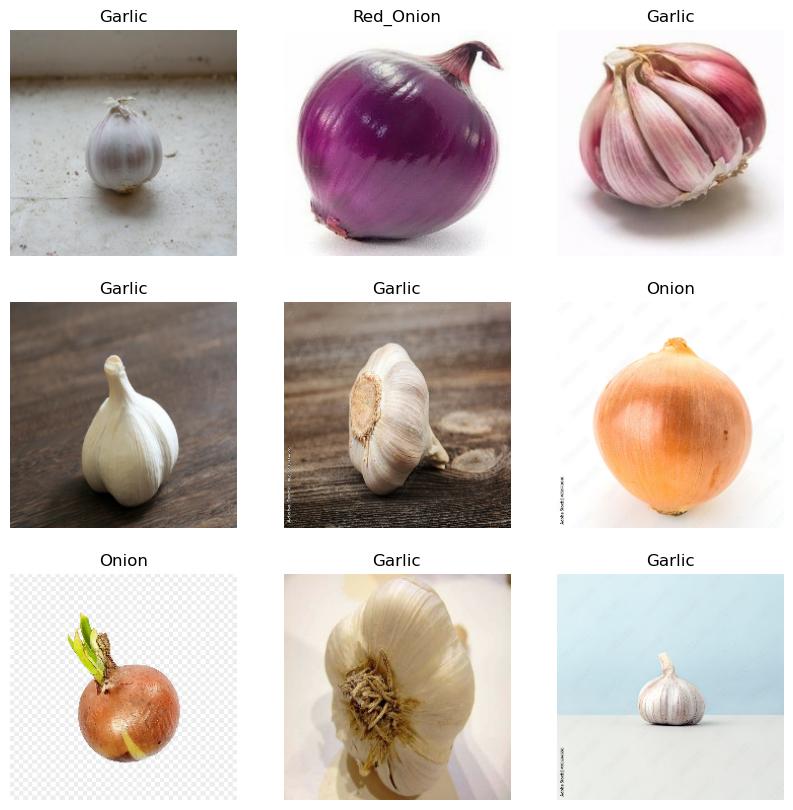

In [122]:
# visualisasi gambar setelah normalisasi
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [123]:
# train validation test split
total_count = len(list(dataset))
val_count = int(total_count * validation_split)
train_count = total_count - val_count
test_count = int(len(dataset) * 0.1) 

print("Total images:", total_count)
print("Train images:", train_count)
print("Validation images:", val_count)
print("Test images:", test_count) 

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count).take(val_count)
test_ds = dataset.skip(train_count + val_count).take(test_count)

Total images: 24
Train images: 22
Validation images: 2
Test images: 2


### Model Architecture

In [124]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape) 

(32, 224, 224, 3)


In [125]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


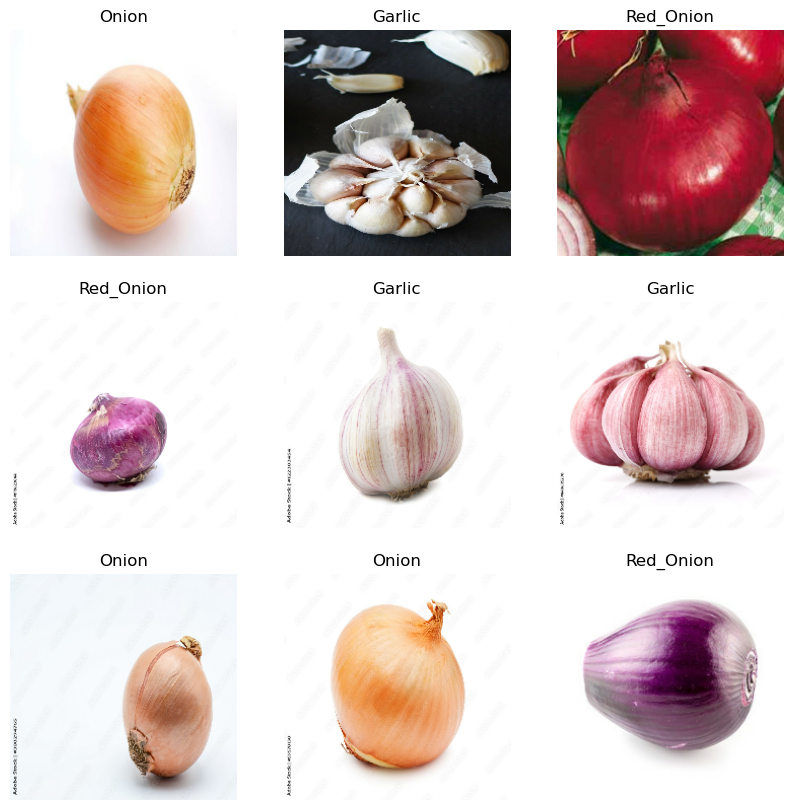

In [126]:
# data augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [127]:
# MobileNet
base_model =  tf.keras.applications.MobileNet(
    weights='imagenet',
    include_top=False, 
    input_shape=(224, 224, 3)
)

base_model.trainable = True

fine_tune_at = len(base_model.layers) // 3
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

modelMobileNet = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

modelMobileNet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

modelMobileNet.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,360,451 (12.82 MB)

 Trainable params: 3,273,731 (12.49 MB)

 Non-trainable params: 86,720 (338.75 KB)

### Model Training

In [128]:
# training menggunakan iteriasi
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=3,
    mode='max'
)

history = modelMobileNet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 950ms/step - accuracy: 0.3427 - loss: 1.7572 - val_accuracy: 0.2826 - val_loss: 1.9101
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 906ms/step - accuracy: 0.3671 - loss: 1.3562 - val_accuracy: 0.3043 - val_loss: 1.5002
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 919ms/step - accuracy: 0.4893 - loss: 1.0673 - val_accuracy: 0.3478 - val_loss: 1.1810
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 948ms/step - accuracy: 0.5500 - loss: 0.9994 - val_accuracy: 0.4783 - val_loss: 0.9350
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 925ms/step - accuracy: 0.6308 - loss: 0.8134 - val_accuracy: 0.6957 - val_loss: 0.7355
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 956ms/step - accuracy: 0.6654 - loss: 0.7227 - val_accuracy: 0.7609 - val_loss: 0.6013
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 958ms/step - accuracy: 0.7240 - loss: 0.6482 - val_accuracy: 0.8478 - val_loss: 0.5030
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 921ms/step - accuracy: 0.7592 - loss: 0.5685 - val_accu

In [129]:
# menyimpan akurasi dan loss
history_df = pd.DataFrame(history.history)
print(history_df)

    accuracy      loss  val_accuracy  val_loss
0   0.312500  1.716265      0.282609  1.910051
1   0.399148  1.264536      0.304348  1.500232
2   0.509943  1.027880      0.347826  1.181036
3   0.578125  0.934822      0.478261  0.934966
4   0.650568  0.785700      0.695652  0.735509
5   0.676136  0.715880      0.760870  0.601254
6   0.741477  0.628058      0.847826  0.502969
7   0.758523  0.569484      0.913043  0.442533
8   0.789773  0.530914      0.934783  0.385851
9   0.825284  0.469637      0.978261  0.337191
10  0.865057  0.408124      1.000000  0.298159
11  0.840909  0.408773      1.000000  0.266518
12  0.836648  0.407169      1.000000  0.238924
13  0.856534  0.378320      1.000000  0.214519


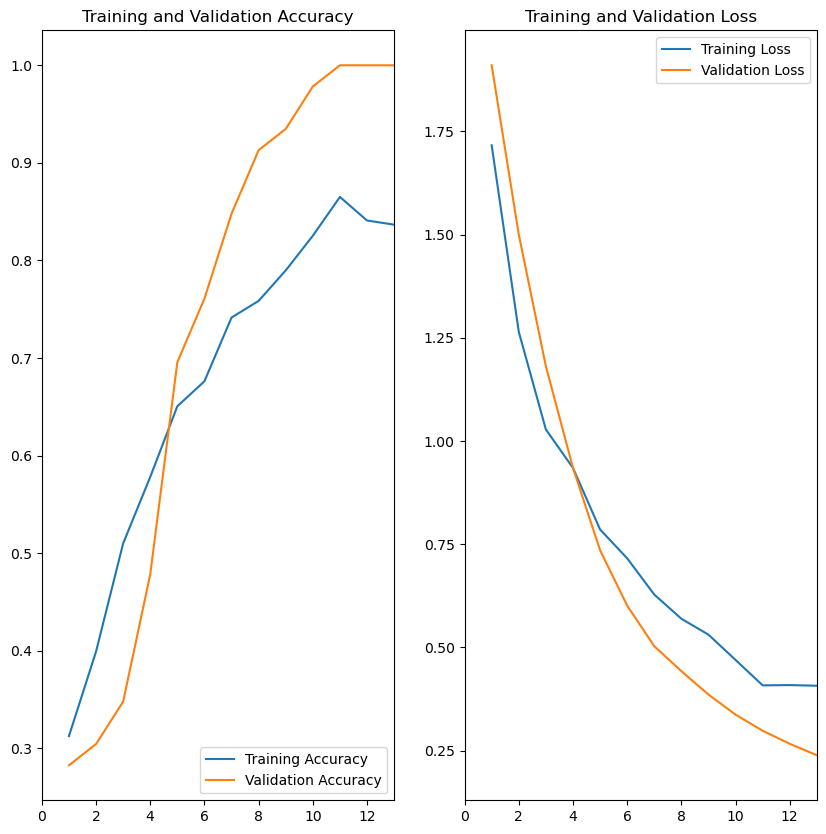

In [130]:
# visualisasi akurasi dan loss
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 13)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(0, 13)
plt.title('Training and Validation Loss')
plt.show()

In [131]:
# menyimpan model
modelMobileNet.save('BestModel_MobileNet_Shogun.h5')

### Model Evaluation

In [132]:
# prediksi untuk set data uji
model = load_model(r'D:\Projek UAS PMDPM SHOGUN\BestModel_MobileNet_Shogun.h5')
class_names = ['Bawang_Bombay', 'Bawang_Merah', 'Bawang_Putih']

# klasifikasi dataset
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100
        
        print('Prediction: {}'.format(class_names[class_idx]))
        print('Confidence: {:.2f}%'.format(confidence))

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f'Prediksi: {class_names[class_idx]} dengan confidence : {confidence:.2f}%. Gambar asli disimpan di {save_path}.'
    except Exception as e:
        return f'Terjadi kesalahan: {e}'
    
result = classify_images(r'D:\Projek UAS PMDPM SHOGUN\Dataset\test\Onion\Onion_248.jpg', save_path='Onion_MobileNet.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
Prediction: Bawang_Putih
Confidence: 42.42%
Prediksi: Bawang_Putih dengan confidence : 42.42%. Gambar asli disimpan di Onion_MobileNet.jpg.


Found 76 files belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step


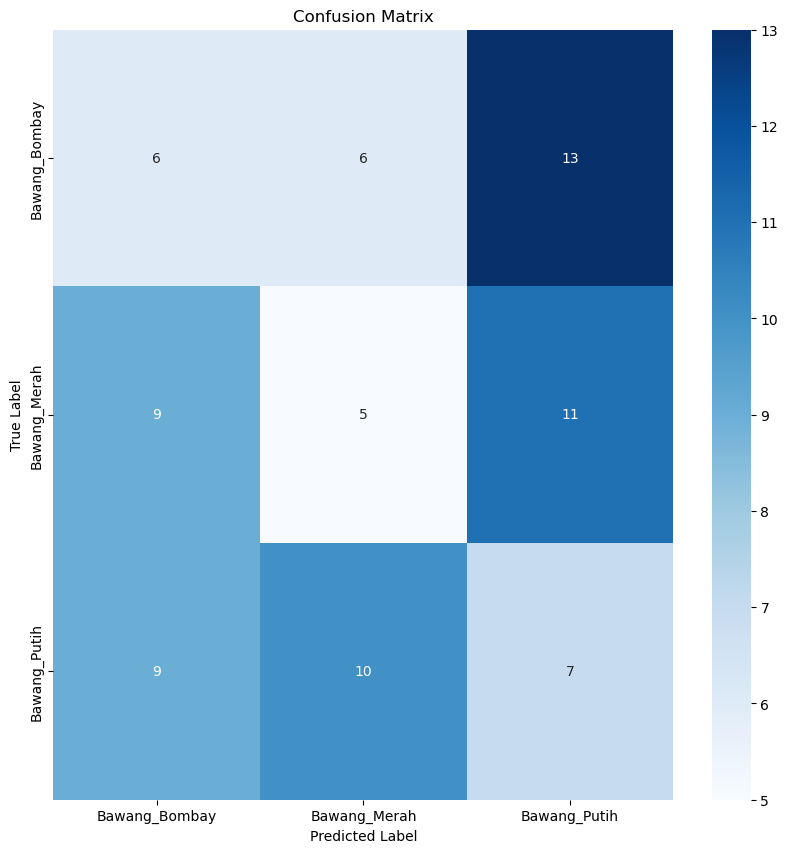

Confusion Matrix:
 [[ 6  6 13]
 [ 9  5 11]
 [ 9 10  7]]
Accuracy: 0.23684210526315788
Precision: [0.25       0.23809524 0.22580645]
Recall: [0.24       0.2        0.26923077]
F1 Score: [0.24489796 0.2173913  0.24561404]


In [133]:
# memuat dataset uji
mobileNet_model = load_model(r'D:\Projek UAS PMDPM SHOGUN\BestModel_MobileNet_Shogun.h5')

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Projek UAS PMDPM SHOGUN\dataset\test',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32
)

# prediksi dataset uji
y_pred = mobileNet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

# mengambil label sebenarnya
true_labels = []
for images, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

# menghitung confusion matrix
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# menghitung matrix evaluasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * precision * recall / (precision + recall)

# menampilkan confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# menampilkan hasil evaluasi
print('Confusion Matrix:\n', conf_mat.numpy())
print('Accuracy:', accuracy.numpy())
print('Precision:', precision.numpy())
print('Recall:', recall.numpy())
print('F1 Score:', f1_score.numpy())